<div style="text-align: center;">

# <u>STREAMFLIX HYBRID MOVIE RECOMMENDATION SYSTEM</u>

</div>


![attachment:logo.png](logo.png)

<div style="font-size: 1.3em; font-style: italic;">

<u>Authors</u>  
- Evaclaire Wamitu  
- Simon Makumi

</div>



# BUSINESS UNDERSTANDING

## Overview

StreamFlix is an online movie streaming platform that aims to implement a movie recommendation system to enhance user experience, increase watch time and improve overall customer retention. This project will utilize the MovieLens dataset to build a hybrid recommendation system that provides personalized top 5 movie recommendations for each user based on their previous ratings and preferences. By implementing a personalized recommendation system, StreamFlix hopes to increase user satisfaction and engagement, boost average watch time per user, improve customer retention rates and differentiate itself from competitors in the streaming market.
This system will combine collaborative filtering techniques with content-based approaches to ensure accurate recommendations. Through this personalized approach, StreamFlix aims to increase user satisfaction and engagement by reducing content discovery friction, boost average watch time per user by suggesting highly relevant content and improve customer retention rates through a more tailored viewing experience. Additionally, the company seeks to differentiate itself from competitors in the streaming market with superior content curation, optimize content acquisition and production strategies based on user preferences. This project aligns with StreamFlix's broader strategy of leveraging data-driven insights to create a more compelling and personalized streaming service ultimately driving business growth and solidifying its position as a market leader in the competitive streaming industry.


## Business Problem



StreamFlix is facing challenges with user retention and engagement. Users are  overwhelmed by the vast library of movies available and often spend a considerable amount of time searching for movies they would enjoy.  

Streamflix have been experiencing high churn rates, decreased watch time and user frustration with content selection. There  has been a 15% decline in average watch time over the past year, high user churn within the first three months of subscription and loss of market share to competitors offering more personalized experiences. These issues are negatively impacting their revenue, customer satisfaction and competitive edge in the streaming market. 



## Objectives

### Main Objective

To develop and deploy a hybrid recommendation system that combines collaborative filtering and content-based filtering techniques to enhance recommendation accuracy by capturing both user-item interactions and movie attributes ensuring a more personalized movie recommendation experience.




### Specific Objectives

1. To build a collaborative filtering model using user ratings to generate top 5 movie recommendations, leveraging algorithms such as Singular Value Decomposition (SVD) and k-Nearest Neighbors (k-NN).
2. To address the cold start problem for new users by integrating content-based filtering, utilizing features such as movie genres, directors, and cast.
3. To evaluate the hybrid recommendation system using appropriate metrics like Root Mean Square Error (RMSE), Mean Average Precision (MAP), and Normalized Discounted Cumulative Gain (NDCG) to ensure accuracy and relevance of the recommendations.



## Success Metrics

1. Root Mean Square Error (RMSE) < 0.9 for rating predictions
2. Mean Average Precision @5 (MAP@5) > 0.3 for recommended movies
3. Precision@5 of around 0.2 to 0.5
4. Recall@5 of around 0.2 to 0.5
5. F1 Score of around 0.3 to 0.7

## Constraints

1. Data Limitations:
Small dataset size leading to potential bias due to demographic skew and time period of ratings and lack of additional movie metadata beyond the information provided in the datasets.

2. Data Sparsity:
Many users may have rated only a small fraction of available movies creating challenges in finding similar users or items with limited data points.

3. Cold Start Problem:
Difficulty providing accurate recommendations for new users or newly added movies, limited effectiveness of collaborative filtering for users with few ratings.

4. A/B Testing Capabilities:
Limitations in conducting extensive A/B tests to compare different recommendation algorithms.

5. Ethical Considerations:
Ensuring fairness in recommendations across different user groups and balancing business objectives with ethical recommendation practices.

6. Genre and Diversity:
Ensuring a balance between accuracy and diversity in recommendations and avoiding over-specialization in user recommendations.

7. Privacy and Data Protection:
Ensuring user data privacy and compliance with regulations like GDPR that establishes the general obligations of data controllers and of those processing personal data on their behalf (processors).

8. Evaluation Metrics:
Limitations of evaluation metrics in reflecting real-world user satisfaction and a lack of direct user feedback on recommendation quality.



















# DATA UNDERSTANDING

This section focuses on getting familiar with our data to gain insights into our features, identify data quality issues and uncover preliminary patterns.

Our model will utilize the Movielens dataset from GroupLens Research Lab covering movie ratings from 1902 to 2018. The dataset contains 100836 ratings and 3683 tag applications across 9742 movies with each user rating at least 20 films. While the full dataset contains 1.9 million ratings, we will focus on a subset of about 100,000 for our current model due to time and resource constraints. This sample size balances computational efficiency with statistical relevance for our recommendation engine development.

We begin by loading the datasets for our movie recommendation system. The datasets include `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv`. These datasets are then merged on the `movieId` column to form a unified DataFrame for further analysis.

In [1]:
# Import relevant libraries

# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# Filter future warnings
import warnings
warnings.filterwarnings('ignore')


We create a class to explore the datasets.

In [2]:
class DataExplorer:
    '''
    A class to handle and explore multiple pandas DataFrames.

    Attributes:
        file_paths (dict): A dictionary of file paths for the csv files to load.
        data (dict): A dictionary of the loaded DataFrames.
        merged_data (pandas.DataFrame): The merged DataFrame.

    Methods:
        load_data(): Load the CSV files into DataFrames.
        merge_data(): Merge the DataFrames on movieId.
        get_shape(): Print the number of rows and columns in the DataFrame.
        summarize_info(): Print a summary of the DataFrame columns.
        describe_data(): Print descriptive statistics of the DataFrame.
        display_column_types(): Display numerical and categorical columns.
    '''

    def __init__(self, file_paths):
        '''
        Initialize the DataExplorer object.

        Args:
            file_paths (dict): A dictionary of file paths for the csv files to load.
        '''
        self.file_paths = file_paths
        self.data = {}
        self.merged_data = None

    def load_data(self):
        '''
        Load the csv files into DataFrames.

        Returns:
            None
        '''
        for name, path in self.file_paths.items():
            print(f'Loading {name} data csv file...')
            try:
                self.data[name] = pd.read_csv(path)
                print(f'{name} dataset loaded successfully from {path}\n')
            except FileNotFoundError:
                print(f'Error: The file \'{path}\' was not found.')
            except Exception as e:
                print(f'Error: An unexpected error occurred: {e}')

    def merge_data(self):
        '''
        Merge the DataFrames on movieId.

        Returns:
            None
        '''
        try:
            print('Merging data on movieId...')
            self.merged_data = pd.merge(self.data['movies'], self.data['ratings'], on='movieId', how='left')
            self.merged_data = pd.merge(self.merged_data, self.data['tags'], on='movieId', how='left')
            self.merged_data = pd.merge(self.merged_data, self.data['links'], on='movieId', how='left')
            print('Data merged successfully\n')
        except KeyError as e:
            print(f'Error: A KeyError occurred: {e}. Please ensure all DataFrames contain the column \'movieId\'.')

    def get_shape(self):
        '''
        Print the number of rows and columns in the merged DataFrame.

        Returns:
            None
        '''
        if self.merged_data is not None:
            rows, columns = self.merged_data.shape
            print(f'The merged DataFrame has {rows} rows and {columns} columns.\n')
        else:
            print('Error: No merged data available. Please call the merge_data() method first.')

    def summarize_info(self):
        '''
        Print a summary of the merged DataFrame columns.

        Returns:
            None
        '''
        print('Summarizing the merged DataFrame info')
        print('-------------------------------')
        if self.merged_data is not None:
            print(self.merged_data.info())
        else:
            print('Error: No merged data available. Please call the merge_data() method first.')

    def describe_data(self):
        '''
        Print descriptive statistics of the merged DataFrame.

        Returns:
            None
        '''
        print('\nDescribing the merged DataFrame data')
        print('--------------------------------')
        if self.merged_data is not None:
            display(self.merged_data.describe())
        else:
            print('Error: No merged data available. Please call the merge_data() method first.')

    def display_column_types(self):
        '''
        Display numerical and categorical columns of the merged DataFrame.

        Returns:
            None
        '''
        print('\nDisplaying numerical and categorical columns of the merged DataFrame')
        print('-----------------------------------------------')
        if self.merged_data is not None:
            numerical_columns = self.merged_data.select_dtypes(include='number').columns
            categorical_columns = self.merged_data.select_dtypes(include='object').columns
            print(f'Numerical Columns: {numerical_columns}\n')
            print(f'Categorical Columns: {categorical_columns}\n')
        else:
            print('Error: No merged data available. Please call the merge_data() method first.')



In [3]:
# Instantiate 
file_paths = {
    'links': 'movies_data/links.csv',
    'movies': 'movies_data/movies.csv',
    'ratings': 'movies_data/ratings.csv',
    'tags': 'movies_data/tags.csv'
}
data_explorer = DataExplorer(file_paths)

# Load data
data_explorer.load_data()

# Merge data
data_explorer.merge_data()

# Get dimensions
data_explorer.get_shape()

# Summarize info
data_explorer.summarize_info()

# Describe data
data_explorer.describe_data()

# Display numerical and categorical columns
data_explorer.display_column_types()


Loading links data csv file...
links dataset loaded successfully from movies_data/links.csv

Loading movies data csv file...
movies dataset loaded successfully from movies_data/movies.csv

Loading ratings data csv file...
ratings dataset loaded successfully from movies_data/ratings.csv

Loading tags data csv file...
tags dataset loaded successfully from movies_data/tags.csv

Merging data on movieId...
Data merged successfully

The merged DataFrame has 285783 rows and 11 columns.

Summarizing the merged DataFrame info
-------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 285783 entries, 0 to 285782
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      285783 non-null  int64  
 1   title        285783 non-null  object 
 2   genres       285783 non-null  object 
 3   userId_x     285762 non-null  float64
 4   rating       285762 non-null  float64
 5   timestamp_x  285762 non-null

,movieId,userId_x,rating,timestamp_x,userId_y,timestamp_y,imdbId,tmdbId
count,285783.000000,285762.000000,285762.000000,2.857620e+05,233234.000000,2.332340e+05,2.857830e+05,285770.000000
mean,14927.663741,313.894279,3.841270,1.214707e+09,470.681354,1.384754e+09,2.956050e+05,12797.315320
std,31402.673519,179.451387,1.020798,2.233730e+08,153.324249,1.534705e+08,5.150156e+05,43479.255523
min,1.000000,1.000000,0.500000,8.281246e+08,2.000000,1.137179e+09,4.170000e+02,2.000000
25%,296.000000,160.000000,3.000000,1.019133e+09,424.000000,1.242494e+09,1.098300e+05,489.000000
50%,1721.000000,314.000000,4.000000,1.211377e+09,477.000000,1.457901e+09,1.125730e+05,680.000000
75%,5673.000000,465.000000,4.500000,1.445346e+09,599.000000,1.498457e+09,2.415270e+05,8963.000000
max,193609.000000,610.000000,5.000000,1.537799e+09,610.000000,1.537099e+09,8.391976e+06,525662.000000



Displaying numerical and categorical columns of the merged DataFrame
-----------------------------------------------
Numerical Columns: Index(['movieId', 'userId_x', 'rating', 'timestamp_x', 'userId_y',
       'timestamp_y', 'imdbId', 'tmdbId'],
      dtype='object')

Categorical Columns: Index(['title', 'genres', 'tag'], dtype='object')



### Loading the Data

Our data is from MovieLens dataset from the GroupLens research lab at the University of Minnesota. 
We begin by loading each dataset into a separate pandas DataFrame and then merging them on the `movieId` column for a more holistic view of the data. 

Below is a description of the datasets:

- **links.csv**: Contains identifiers that link MovieLens IDs with IMDb and TMDb IDs.
- **movies.csv**: Contains movie information including titles and genres.
- **ratings.csv**: Contains user ratings for different movies.
- **tags.csv**: Contains user-generated tags for different movies.

### Merged DataFrame

After loading and merging the datasets, the resulting DataFrame has **285,783 rows and 11 columns**. Here is a brief summary of the columns in the merged DataFrame:

- **movieId**: Unique identifier for each movie.
- **title**: Movie title.
- **genres**: Movie genres.
- **userId_x**: User ID for ratings.
- **rating**: Rating given by the user.
- **timestamp_x**: Timestamp of the rating.
- **userId_y**: User ID for tags.
- **tag**: User-generated tag.
- **timestamp_y**: Timestamp of the tag.
- **imdbId**: IMDb identifier for the movie.
- **tmdbId**: TMDb identifier for the movie.


### Numerical and Categorical Columns

The DataFrame contains the following numerical and categorical columns:

- **Numerical Columns**: `movieId`, `userId_x`, `rating`, `timestamp_x`, `userId_y`, `timestamp_y`, `imdbId`, `tmdbId`.
- **Categorical Columns**: `title`, `genres`, `tag`.

There is a disparity in the total number of values within the different columns that may not necessarily be missing values but that will be addressed in the following section after unnecessary columns are dropped.

# DATA PREPARATION

In this section, we prepare the data for exploratory data analysis (EDA) and modeling. The preprocessing involves several key steps to address and correct errors in the data such as missing values, outliers, duplicates and inconsistencies.


In [4]:
# Display first few rows of the merged data
display(data_explorer.merged_data.head())

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,964982703.0,336.0,pixar,1.139046e+09,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,964982703.0,474.0,pixar,1.137207e+09,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,964982703.0,567.0,fun,1.525286e+09,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,847434962.0,336.0,pixar,1.139046e+09,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,847434962.0,474.0,pixar,1.137207e+09,114709,862.0


### Drop Less Relevant Columns
To streamline the dataset, we are going to drop `timestamp_x`, `timestamp_y`, `tag`, `userId_y`, `imdbId`and `tmdbId` which are the least relevant for our analysis.

* We drop the timestamps because it indicates when a user rated a movie but does not contribute to understanding user preferences or the quality of the recommendations.
* We drop the tags user ID, imdb ID and tmdb ID as they all convey the same information and opt to retain the ratings user ID as our unique identifier.

* We drop the tag column to eliminate redundancy, reduce dataset sparsity and to simplify model complexity allowing a focus on more impactful predictors like ratings and genres.

In [5]:
# Drop less relevant columns
data_explorer.merged_data.drop(columns=['timestamp_x', 'timestamp_y', 'userId_y', 'tag', 'imdbId', 'tmdbId'], inplace=True)

# Display the first few rows of the cleaned data
display(data_explorer.merged_data.head())


,movieId,title,genres,userId_x,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0


### Rename Columns
To improve clarity, we renamed the column userId_x to user_id using the following function:

In [6]:
# A function to rename columns
def rename_column(df, current_name, new_name):
    '''
    Renames a column in the DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing the column to rename.
        current_name (str): The current name of the column.
        new_name (str): The new name for the column.

    Returns:
        pandas.DataFrame: DataFrame with the renamed column.
    '''
    
    if current_name in df.columns:
        df.rename(columns={current_name: new_name}, inplace=True)
        print(f"Column '{current_name}' has been renamed to '{new_name}'.\n")
    else:
        print(f"Column '{current_name}' does not exist in the DataFrame.\n")
    return df

In [7]:
rename_column(data_explorer.merged_data, 'userId_x', 'user_id')

Column 'userId_x' has been renamed to 'user_id'.



,movieId,title,genres,user_id,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0
...,...,...,...,...,...
285778,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0
285779,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5
285780,193585,Flint (2017),Drama,184.0,3.5
285781,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,3.5


### Extract Release Year from Title

We extract the release year from the title because it will help to categorize the movies more accurately improving the search capabilities of our movie recommendation system.

In [8]:
# Define a regular expression pattern to extract title and year
pattern = r'(.*) \((\d{4})\)'

# Create 'release_year' and 'title' columns based on the pattern
data_explorer.merged_data[['title', 'release_year']] = data_explorer.merged_data['title'].str.extract(pattern)
    
# Convert 'release_year' to numeric (it might be extracted as strings)
data_explorer.merged_data['release_year'] = pd.to_numeric(data_explorer.merged_data['release_year']).astype('Int64')  

# Remove the parentheses from the title
data_explorer.merged_data['title'] = data_explorer.merged_data['title'].str.strip()


In [9]:
data_explorer.merged_data.head()

,movieId,title,genres,user_id,rating,release_year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1995


In [10]:
# Genre Processing: Split the genres in the `movies.csv` dataset into lists for easier analysis
data_explorer.merged_data['genres']=[row.strip().lower().replace('|',', ') for row in data_explorer.merged_data['genres']]
data_explorer.merged_data.head()

,movieId,title,genres,user_id,rating,release_year
0,1,Toy Story,"adventure, animation, children, comedy, fantasy",1.0,4.0,1995
1,1,Toy Story,"adventure, animation, children, comedy, fantasy",1.0,4.0,1995
2,1,Toy Story,"adventure, animation, children, comedy, fantasy",1.0,4.0,1995
3,1,Toy Story,"adventure, animation, children, comedy, fantasy",5.0,4.0,1995
4,1,Toy Story,"adventure, animation, children, comedy, fantasy",5.0,4.0,1995


### Check for Missing Values

Checking to see whether there are any missing values in our data.

In [11]:
# Check for missing values
print(data_explorer.merged_data.isnull().sum())

movieId          0
title           20
genres           0
user_id         21
rating          21
release_year    20
dtype: int64


### Drop Missing Values

This revealed some missing values in `title`and `rating` columns. Since there were only 21 missing values in the rating column and 20 in the title column, we decided to drop these rows.

In [12]:
# Drop null values 
data_explorer.merged_data.dropna(subset=['rating', 'title'], inplace=True)
print(data_explorer.merged_data.isnull().sum())


movieId         0
title           0
genres          0
user_id         0
rating          0
release_year    0
dtype: int64


### Remove Duplicate Rows

Next step is to check whether there are any duplicate values within our data.

In [13]:
# Drop duplicates
data_explorer.merged_data.drop_duplicates(inplace=True)
# Reset index and drop the old index column
data_explorer.merged_data.reset_index(drop=True, inplace=True)
# Print output
print(data_explorer.merged_data.duplicated().sum())

0


With no missing values, we proceed to view the properties of the Dataframe columns and convert the user ID data type from float to integer.

In [14]:
data_explorer.merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100818 entries, 0 to 100817
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   movieId       100818 non-null  int64  
 1   title         100818 non-null  object 
 2   genres        100818 non-null  object 
 3   user_id       100818 non-null  float64
 4   rating        100818 non-null  float64
 5   release_year  100818 non-null  Int64  
dtypes: Int64(1), float64(2), int64(1), object(2)
memory usage: 4.7+ MB


In [15]:
# Convert user_id from float to int
data_explorer.merged_data['user_id'] = data_explorer.merged_data['user_id'].astype(int)
data_explorer.merged_data['user_id'].dtype

dtype('int64')

With this final step, we proceed to our exploratory data analysis.

# EXPLORATORY DATA ANALYSIS (EDA)

In this section we will perform exploratory data analysis to identify patterns, trends and relationships within the data. This will involve visualizations as well as statistical techniques to summarize the main characteristics of the data.

## Univariate Analysis

This will involve analyzing and summarizing individual variables in our dataset to describe the basic features and patterns without considering relationships between variables. First step is to assign the variable 'df' to data_explorer.merged_data for ease of reference and then previewing the first five columns. 

In [16]:
df = data_explorer.merged_data
df.head()

,movieId,title,genres,user_id,rating,release_year
0,1,Toy Story,"adventure, animation, children, comedy, fantasy",1,4.0,1995
1,1,Toy Story,"adventure, animation, children, comedy, fantasy",5,4.0,1995
2,1,Toy Story,"adventure, animation, children, comedy, fantasy",7,4.5,1995
3,1,Toy Story,"adventure, animation, children, comedy, fantasy",15,2.5,1995
4,1,Toy Story,"adventure, animation, children, comedy, fantasy",17,4.5,1995


For our univariate analysis, we will create a class that will perform univariate analysis on the frequency of the ratings, genres and release year columns. Functions used:
`plot_ratings_frequency()`: Creates a count plot of ratings and prints the frequency of each rating.

`plot_genres_frequency()`: Splits the 'genres' column by comma and space (', ') and stacks the result creating a Series where each element is a single genre and then counts the frequency, creates a bar plot and prints the frequency of every genre.

`plot_year_frequency()`: Creates a line plot showing the number of movies per year and prints the number of movies per decade.

`plot_outliers()` : Creates a box plot that helps to identify the central tendency of ratings (median), the spread of ratings (interquartile range) and any outliers in the ratings data.

`run_univariate()`: Runs all four analyses sequentially.

Displaying Ratings Frequency...
-------------------------------


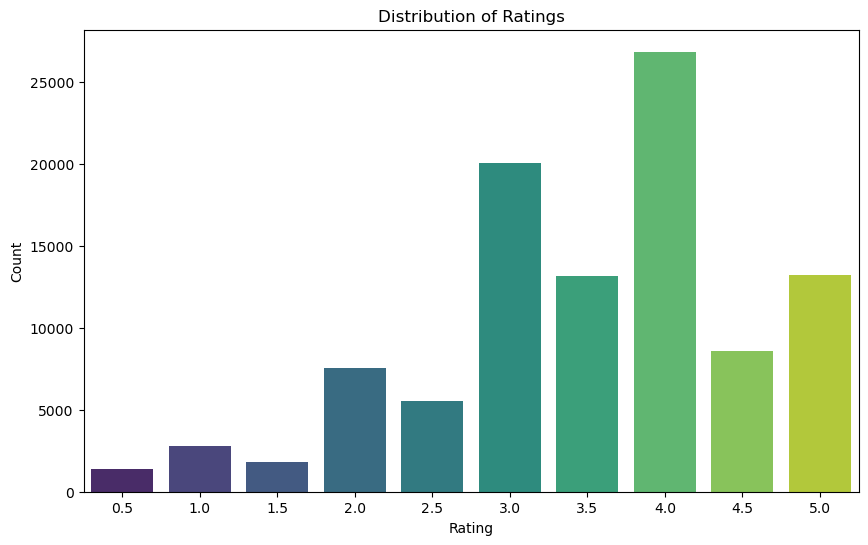

Rating Frequency:
0.5     1369
1.0     2810
1.5     1791
2.0     7550
2.5     5550
3.0    20044
3.5    13134
4.0    26815
4.5     8549
5.0    13206
Name: rating, dtype: int64


Displaying Genres Frequency...
------------------------------


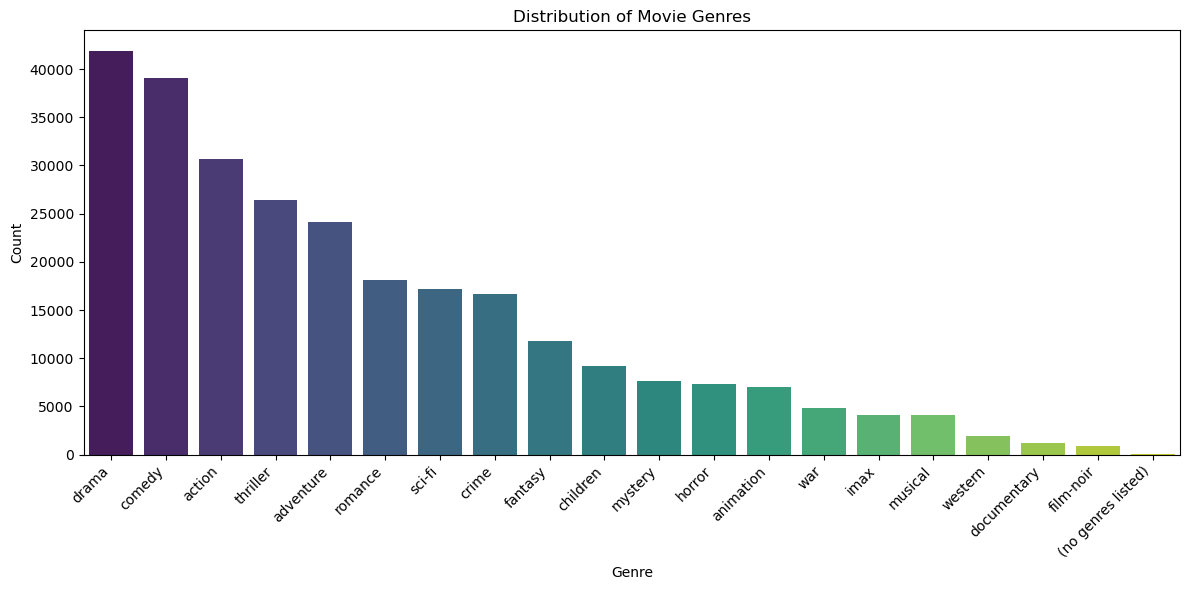

Top 10 Genres:
drama        41926
comedy       39053
action       30631
thriller     26447
adventure    24161
romance      18124
sci-fi       17237
crime        16681
fantasy      11834
children      9208
dtype: int64


Displaying Year Frequency...
----------------------------


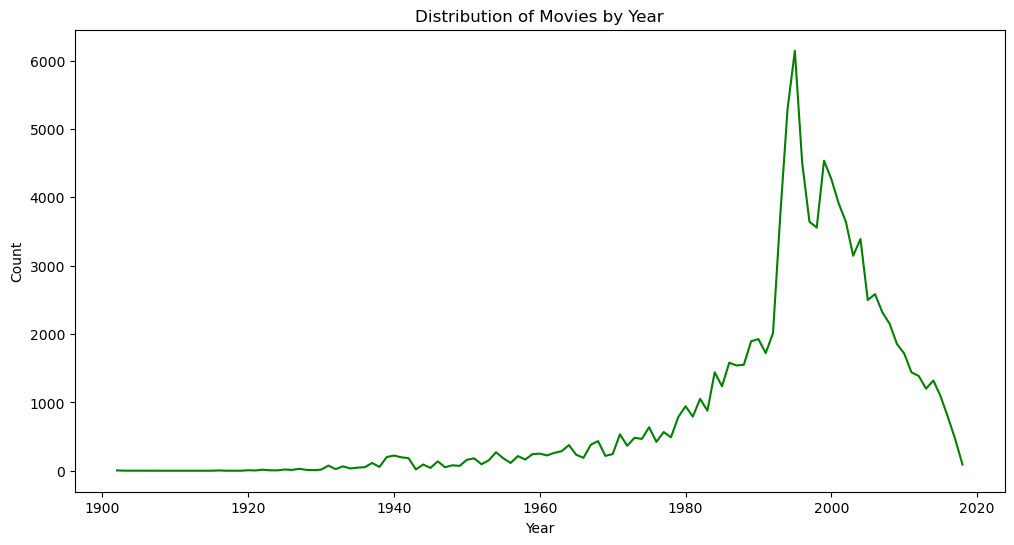

Movies per Decade:
1900        8
1910        8
1920      125
1930      687
1940     1101
1950     1784
1960     2858
1970     4995
1980    12912
1990    37087
2000    29766
2010     9487
Name: release_year, dtype: int64


Displaying Outliers...
-----------------------


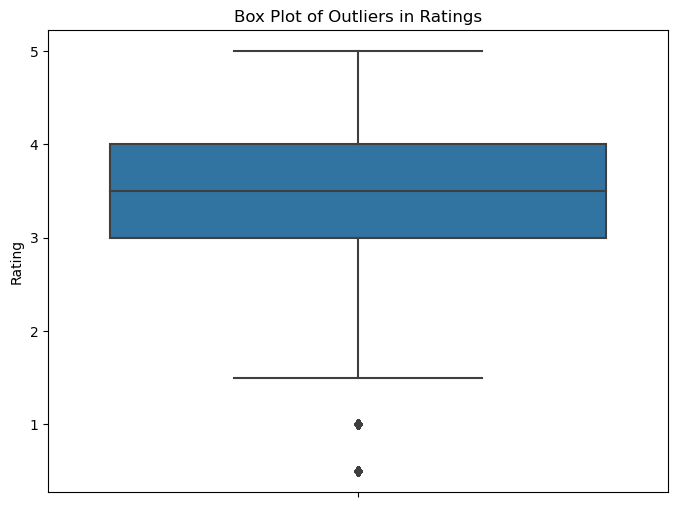

In [17]:
class UnivariateAnalysis:
    '''
    A class for performing univariate analysis on movie data.
    
    Attributes:
        df (DataFrame): A pandas DataFrame containing movie data.
    '''
    
    def __init__(self, df):
        '''
        Initializes the UnivariateAnalysis class with a DataFrame.
        
        Parameters:
            df (DataFrame): A pandas DataFrame containing the movie data to analyze.
        '''
        self.df = df
        
    def plot_ratings_frequency(self):
        
        '''
        This method creates a count plot to visualize the frequency of each rating
        and prints the counts of each rating.
        '''
        
        plt.figure(figsize=(10, 6))
        sns.countplot(x='rating', data=self.df, palette='viridis')
        plt.title('Distribution of Ratings')
        plt.xlabel('Rating')
        plt.ylabel('Count')
        plt.show()
        
        rating_counts = self.df['rating'].value_counts().sort_index()
        print("Rating Frequency:")
        print(rating_counts)
        
    def plot_genres_frequency(self):
        
        '''
        This method splits the genres into individual entries, counts the frequency
        of each genre, and creates a bar plot to visualize the distribution.
        It also prints the top 10 genres.
        '''
        
        genres = self.df['genres'].str.split(', ', expand=True).stack()
        # Count unique genres
        genre_counts = genres.value_counts()
        
        plt.figure(figsize=(12, 6))
        sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
        plt.title('Distribution of Movie Genres')
        plt.xlabel('Genre')
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        print("Top 10 Genres:")
        print(genre_counts.head(10))
        
    def plot_year_frequency(self):
        
        '''
        This method counts the number of movies released each year and creates
        a line plot to visualize the distribution. It also prints the number of
        movies released per decade.
        '''
        
        year_counts = self.df['release_year'].value_counts().sort_index()
        
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=year_counts.index, y=year_counts.values, color='green')
        plt.title('Distribution of Movies by Year')
        plt.xlabel('Year')
        plt.ylabel('Count')
        plt.show()
        
        print("Movies per Decade:")
        decade_counts = self.df['release_year'].apply(lambda x: x - x % 10).value_counts().sort_index()
        print(decade_counts)

    def plot_rating_outliers(self):
        
        '''
        This method generates a box plot that displays the median, quartiles,
        and potential outliers of the ratings in the dataset. 
        '''
        
        plt.figure(figsize=(8, 6))
        sns.boxplot(y='rating', data=self.df)
        plt.title('Box Plot of Outliers in Ratings')
        plt.ylabel('Rating')
        plt.show()

        
    def run_univariate(self):
        
        '''
        This method sequentially calls the methods to analyze ratings frequency,
        genres frequency, and year frequency, printing progress messages.
        '''
        
        print('Displaying Ratings Frequency...')
        print('-------------------------------')
        self.plot_ratings_frequency()
        print('\n\nDisplaying Genres Frequency...')
        print('------------------------------')
        self.plot_genres_frequency()
        print('\n\nDisplaying Year Frequency...')
        print('----------------------------')
        self.plot_year_frequency()
        print('\n\nDisplaying Outliers...')
        print('-----------------------')
        self.plot_rating_outliers()

# Instantiate
univariate = UnivariateAnalysis(df)
univariate.run_univariate()


### Summary

From the `distribution of ratings` plot we can see that the most common rating is 4.0 with about 25,000 movies and the distribution is positively skewed favouring higher ratings. Significant counts can also be seen at 3.0 and 3.5 while ratings of 2.0, 4.5 and 5.0 are notable but less frequent. Extremely low ratings of 0.5 and 1.0 are less common, suggesting that most movies are rated at least moderately well.

From the `distribution of genres` plot we can see that the most prevalent genre is Drama featuring slightly more than 40,000 movies closely followed by Comedy, which has just under 40,000 films. Action and Thriller genres also have substantial representations with Action being more popular than Thriller.
Moderately popular genres include Adventure and Romance each boasting over 20,000 movies while Sci-Fi and Crime have slightly fewer titles than these two.
Less common genres include Fantasy, Children’s, Mystery and Horror with moderate counts but significantly fewer than the top genres. Animation, War, IMAX, Musical and Western genres have even lower counts each with fewer than 10,000 movies indicating that they may cater to more niche audiences.
Documentary and Film-Noir are among the least common genres with each having fewer than 5,000 movies. There also appears to be a category for movies without any listed genres with a very low count.

The `distribution of movies by year` plot illustrates the historical trends in movie production highlighting periods of growth, peak and decline. We can see that the movie industry experienced significant growth starting in the late 1960s with a sharp increase in production through the 1990s and early 2000s.
The peak period is around the late 1990s with a maximum output of over 6,000 movies in the peak years.
This is then followed by a steep decline in movie production suggesting changes in the industry such as shifts in movie consumption, technological changes or economic factors affecting production.

From the `analyze_rating_outliers` we can identify some outliers in the ratings column but we'll keep them as they will be important in the curation of our recommender system.

## Bivariate Analysis

Bivariate analysis refers to the statistical examination of two variables to understand the relationship between them. We create a `BivariateAnalysis` class designed to perform various bivariate analyses on our dataset. In this instance we shall explore relationships between release years vs ratings, genres vs ratings, movie titles vs rating and movie titles vs total number of people who have rated them. .

Displaying Release Year vs Average Rating...
--------------------------------------------


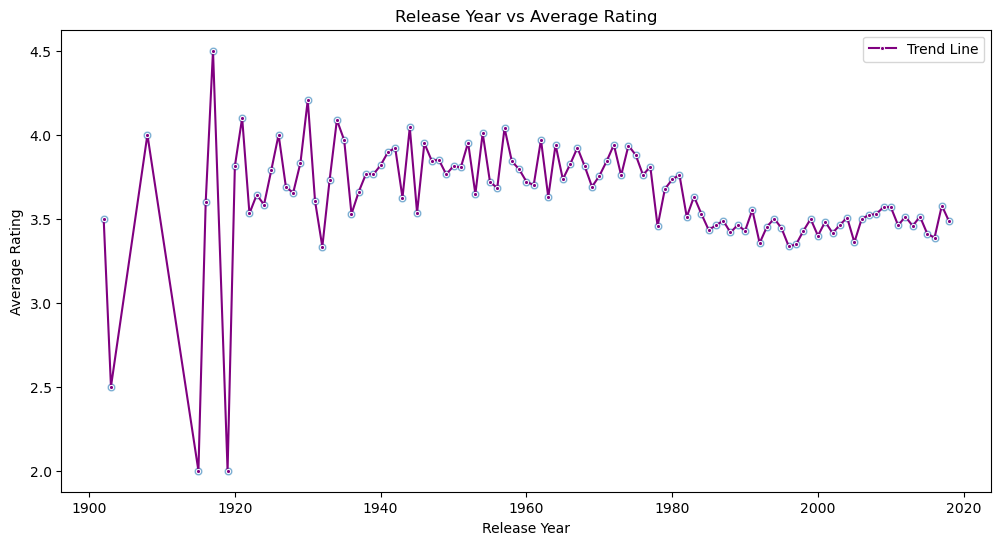



Displaying Genres vs Average Rating...
---------------------------------------


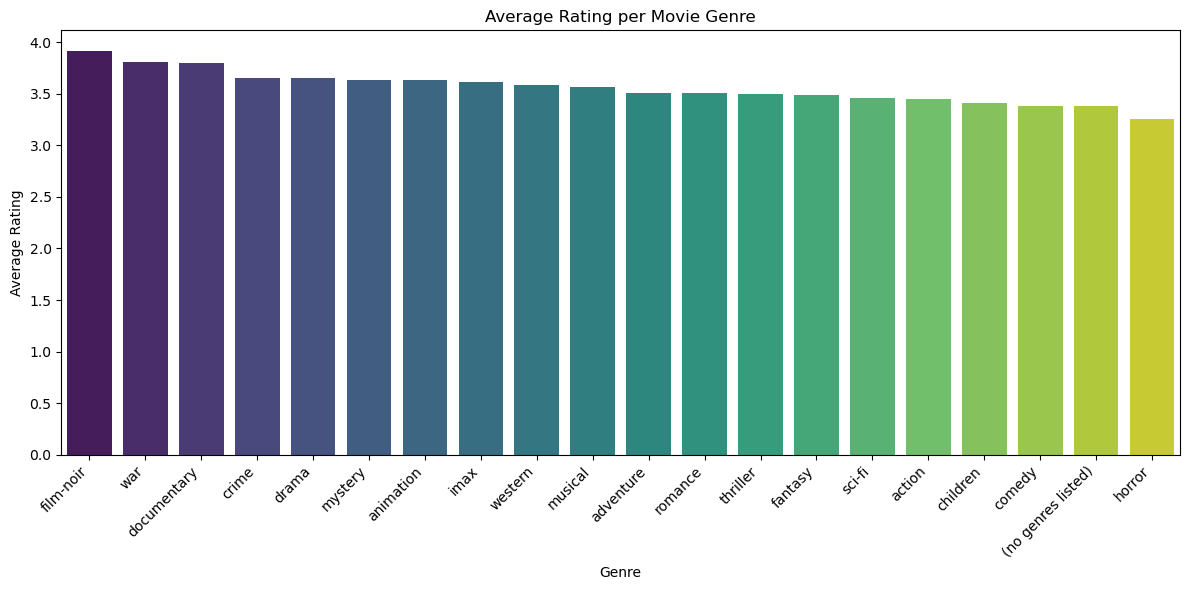



Displaying Highest Movies Ratings...
-----------------------------------


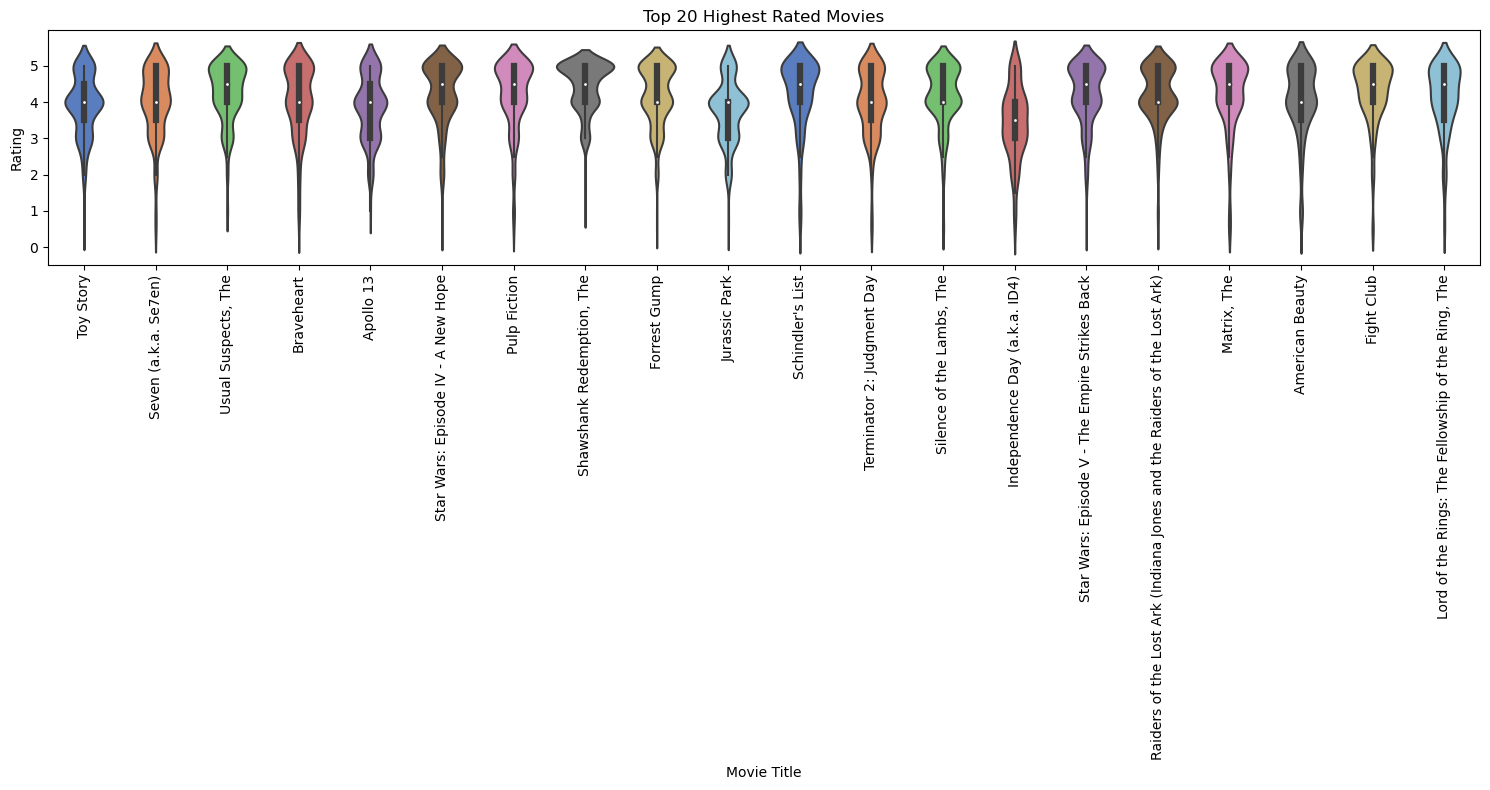



Displaying Top Rated Titles...
-------------------------------


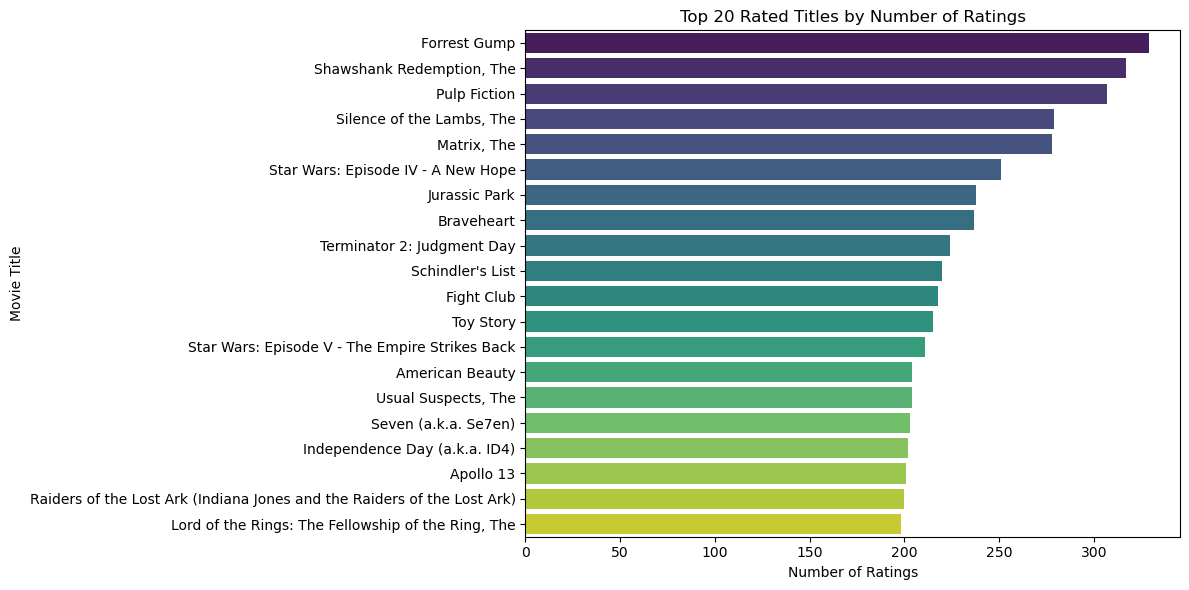



Displaying Correlation in Numeric Features...
--------------------------------------------



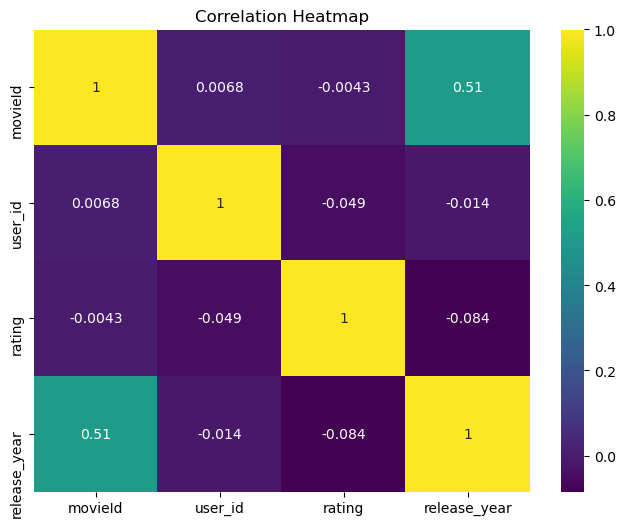

In [18]:
class BivariateAnalysis:
    '''
    A class for performing multivariate analysis on movie data.
    '''

    def __init__(self, df):
        '''
        Initialize the MultivariateAnalysis class with a DataFrame.

        Args:
            df (pandas.DataFrame): The DataFrame containing movie data.
        '''
        self.df = df

    def plot_year_vs_rating(self):
        
        '''
        This method creates a scatter plot showing the distribution of ratings
        across release years, segmented by genre.
        '''
        
        # Group by release year and calculate the average rating
        average_ratings_by_year = self.df.groupby('release_year')['rating'].mean().reset_index()
    
        # Scatter plot of release year vs average rating
        plt.figure(figsize=(12, 6))
        sns.scatterplot(x='release_year', y='rating', data=average_ratings_by_year, alpha=0.6)
        
        # Add a line plot to show the trend
        sns.lineplot(x='release_year', y='rating', data=average_ratings_by_year, color='purple', marker='.', label='Trend Line')
        plt.title('Release Year vs Average Rating')
        plt.xlabel('Release Year')
        plt.ylabel('Average Rating')
        plt.legend()
        plt.show()

    def plot_genre_vs_rating(self):
        
        '''
        This method creates a bar plot showing the average rating for each genre
        across different decades.
        '''
        
        # Split genres into multiple rows
        genres = self.df['genres'].str.split(', ', expand=True).stack()
        # Adjust index to remove the extra level created by the split
        genres.index = genres.index.droplevel(-1)
        # Rename the Series to 'genre' 
        genres.name = 'genre'
        
        # Create a new DataFrame with genres and ratings
        genre_ratings = self.df[['rating']].join(genres)
        
        # Calculate the mean rating for each genre
        genre_mean_ratings = genre_ratings.groupby('genre')['rating'].mean().sort_values(ascending=False)
        
        # Plot the mean rating for each genre
        plt.figure(figsize=(12, 6))
        sns.barplot(x=genre_mean_ratings.index, y=genre_mean_ratings.values, palette='viridis')
        plt.title('Average Rating per Movie Genre')
        plt.xlabel('Genre')
        plt.ylabel('Average Rating')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


    def plot_highest_movie_ratings(self):
        
        '''
        This method creates a violin plot showing the distribution of ratings
        for the top 20 movies with the highest ratings.
        '''
        
        movie_counts = self.df['title'].value_counts().reset_index()
        movie_counts.columns = ['title', 'count']
        top_twenty_movies = movie_counts.head(20)
        
        top_twenty_data = self.df[self.df['title'].isin(top_twenty_movies['title'])]
        
        plt.figure(figsize=(15, 8))
        sns.violinplot(x='title', y='rating', data=top_twenty_data, palette='muted')
        plt.title('Top 20 Highest Rated Movies')
        plt.xlabel('Movie Title')
        plt.ylabel('Rating')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

    def plot_top_rated_titles(self, top_n=20):
        
        '''
        This method counts the number of ratings for each title, sorts them,
        and creates a bar plot to visualize the top n titles based on the total 
        number of ratings received.
    
        Parameters:
            top_n (int): The number of top-rated titles to display. Default is 20.
        '''
        
        # Count the number of ratings for each title
        title_counts = self.df['title'].value_counts().head(top_n)
    
        # Create a bar plot for the top rated titles
        plt.figure(figsize=(12, 6))
        sns.barplot(x=title_counts.values, y=title_counts.index, palette='viridis')
        plt.title(f'Top {top_n} Rated Titles by Number of Ratings')
        plt.xlabel('Number of Ratings')
        plt.ylabel('Movie Title')
        plt.tight_layout()
        plt.show()
        
    def plot_correlation_heatmap(self):
        
        '''
        This method plots a heatmap to visualize the correlation between numeric features in the dataset.
        '''
        
        numeric_df = self.df[['movieId', 'user_id', 'rating', 'release_year']]
        plt.figure(figsize=(8, 6))
        sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
        plt.title('Correlation Heatmap')
        plt.show()
        
    def run_bivariate (self):
        ''' 
        This method sequentially calls the methods Runs bivariate analyses on the dataset.
            
        '''
        print('Displaying Release Year vs Average Rating...')
        print('--------------------------------------------')
        self.plot_year_vs_rating()
        print('\n\nDisplaying Genres vs Average Rating...')
        print('---------------------------------------')
        self.plot_genre_vs_rating()
        print('\n\nDisplaying Highest Movies Ratings...')
        print('-----------------------------------')
        self.plot_highest_movie_ratings()
        print('\n\nDisplaying Top Rated Titles...')
        print('-------------------------------')
        self.plot_top_rated_titles()
        print('\n\nDisplaying Correlation in Numeric Features...')
        print('--------------------------------------------\n')
        self.plot_correlation_heatmap()
    

bivariate = BivariateAnalysis(df)
bivariate.run_bivariate()

### Summary

The `Release Year vs Average Rating` plot reveals fluctuations in early years (1900-1940) probably due to the film industry's nascent stage. This is followed by peaks in the early 1900s, stabilization after the 1940s and a gradual decline from the 1970s to 2020. There appears to be consistency around a rating of 3.5 from the 1980s to 2020 with outliers becoming less extreme over time.

The `Average Rating Per Movie Genre` plot shows the average ratings of movies across various genres. Film-noir and war genres receive the highest average ratings nearing 4.0. Documentary, crime and drama also score highly around 3.75. Genres like mystery, animation, IMAX, western and musical follow closely. Adventure, romance, thriller and fantasy genres are rated slightly lower at around 3.5 while Sci-fi, action, children and comedy have average ratings closer to 3.0. The genres with the lowest average ratings are those that have not been specified and horror movies which both fall below 3.0. Overall, film-noir and war are the most highly rated genres, while horror films receive the lowest average rating.

The `Top 20 Highest Rated Movies` plot displays the rating distributions for the top 20 highest-rated movies. Each movie is represented by a vertical violin shape with the width indicating the frequency of ratings at each score level. The plots generally show a concentration of high ratings with most movies having a bulge near the top of the 5-point scale. There's some variation in the shapes suggesting differences in rating patterns across films but overall the distributions skew towards positive ratings for these top-rated movies.

The `Top 20 Rated Titles by Number of Ratings` plot shows that 'Forrest Gump' leads the list with the highest number of ratings followed closely by 'The Shawshank Redemption' and 'Pulp Fiction'. The ratings range from around 200 ('Lord of the Rings: The Fellowship of the ring') to nearly 300 for the top-rated films indicating these are all highly popular and widely reviewed. 

The `Correlation Heatmap` visualizes the relationships between the numeric variables in our dataset. It shows a strong positive correlation (0.98) between release year and decade, moderate positive correlations between movieId and both release year (0.51) and decade (0.5) and weak or negligible correlations among the other variables. The diagonal values of 1 represent perfect self-correlation.

# MODELING

## Collaborative Filtering

### Dummy model
A dummy or vanilla model is a simple model that is typically used as a reference or baseline against which more complex models are compared. Its purpose is to provide a reference point to evaluate the effectiveness of the more sophisticated algorithms. For our model, we evaluate the dummy model using the Surprise library. The data is prepared using the Reader and Dataset classes from `Surprise` to format our DataFrame containing movie ratings with a rating scale between 1 and 5. The dataset is then divided into training and test sets reserving 25% of the data for testing purposes. A `NormalPredictor` dummy model is then created which generates random predictions based on the observed distribution of ratings and this model is trained on the training set. The performance of the model is evaluated on the test set using the Root Mean Squared Error (RMSE) metric which provides a quantitative measure of its accuracy. Finally, the RMSE of the dummy model is printed showing the baseline performance for comparison with Singular Value Decomposition `SVD` and K-Nearest Neighbors `KNN` algorithms.

In [19]:
import logging
from surprise import NormalPredictor
from surprise import Reader, Dataset, SVD, KNNBasic
from surprise.model_selection import cross_validate, GridSearchCV
from surprise.model_selection import train_test_split
from surprise import accuracy
# Set up logging to suppress lower-level messages
logging.basicConfig(level=logging.WARNING)


# Prepare the data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'movieId', 'rating']], reader)

# Split the data
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

# Create and evaluate the dummy model
dummy_model = NormalPredictor()
dummy_model.fit(trainset)
predictions = dummy_model.test(testset)
baseline_rmse = accuracy.rmse(predictions)

print(f"Baseline Model RMSE: {baseline_rmse}")

RMSE: 1.4178
Baseline Model RMSE: 1.417800588660784


We find that the RMSE of the baseline model is aproximately 1.43. The next step is to perform grid search cross validation to find the best parameters for  the Singular Value Decomposition (SVD) and K-Nearest Neighbors (KNN) models. The `Surprise` library hosts a `GridSearchCV` feature that performs this task.
Grid searching the SVD model focuses on tuning the following hyperparameters:

**`n_factors`**: Number of latent factors
**`n_epochs`**: Number of iterations for training 
**`lr_all`**: Learning rate for all parameters 
**`reg_all`**: Regularization term for all parameters

Grid searching the KNN model focuses on tuning the following hyperparameters: 
**`k`**: The number of neighbors to consider when making predictions.
**`min_k`**: The minimum number of neighbors required to make a prediction. If fewer neighbors are found, predictions are made based on default values.
**`sim_options`**: A dictionary specifying the similarity options. This includes:
`msd` (Mean Squared Difference)
`cosine` (Cosine Similarity)
`pearson` (Pearson Correlation)
**`user_based`**: Whether to use user-based or item-based filtering.
`True for user-based`
`False for item-based`

These hyperparameters can be adjusted depending on the dataset and computational resources. After performing the grid search to find the best hyperparameters, the next step is to cross-validate the model with the best parameters. This ensures that the model's performance generalizes well to unseen data.

In [20]:
def grid_search_models(data):
    '''
    Performs a grid search to tune hyperparameters for SVD and KNN models, evaluates their performance using RMSE, and returns the best model based on RMSE.

    Parameters:
    data (Dataset): The Surprise Dataset object containing the rating data.

    Returns:
    tuple: A tuple containing the name of the best model ('SVD' or 'KNN') and its corresponding RMSE score.
    '''
    # Define parameter grids
    svd_param_grid = {
        'n_factors': [20, 50, 100],
        'n_epochs': [10, 15, 30], 
        'lr_all': [0.002, 0.005, 0.01],
        'reg_all': [0.02, 0.05, 0.1]
    }
    
    knn_param_grid = {
        'k': [10, 20, 30],
        'min_k': [1, 5, 10],
        'sim_options': {'name': ['pearson', 'cosine', 'msd'], 'user_based': [True, False]}
    }
    
    # Perform grid search for SVD
    print('Tuning SVD...')
    gs_svd = GridSearchCV(SVD, svd_param_grid, measures=['rmse'], cv=3)
    gs_svd.fit(data)
    
    svd_best_params = gs_svd.best_params['rmse']
    svd_best_score = gs_svd.best_score['rmse']
    
    print(f"Best SVD parameters: {svd_best_params}")
    print(f"Best SVD RMSE: {svd_best_score}")
    
    # Perform grid search for KNN
    print('Tuning KNN...')
    gs_knn = GridSearchCV(KNNBasic, knn_param_grid, measures=['rmse'], cv=3)
    gs_knn.fit(data)
    
    knn_best_params = gs_knn.best_params['rmse']
    knn_best_score = gs_knn.best_score['rmse']
    
    print(f"Best KNN parameters: {knn_best_params}")
    print(f"Best KNN RMSE: {knn_best_score}")
    
    # Determine the best overall model
    if svd_best_score < knn_best_score:
        best_model_class = SVD(**svd_best_params)
        best_model_params = svd_best_params
        best_model_name = 'SVD'
        best_score = svd_best_score
    else:
        best_model_class = KNNBasic(**knn_best_params)
        best_model_params = knn_best_params
        best_model_name = 'KNN'
        best_score = knn_best_score
    
    print(f"\nBest model: {best_model_name}")
    print(f"\nBest RMSE: {best_score}")
    
    return best_model_name, best_score

# Instantiate
best_model_name, best_score = grid_search_models(data)

Tuning SVD...
Best SVD parameters: {'n_factors': 100, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1}
Best SVD RMSE: 0.8633982401542354
Tuning KNN...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computin

### Summary

The output reveals the results of tuning and evaluating recommendation models using grid search. For the SVD model, the optimal parameters were identified as having 100 factors, 30 epochs, a learning rate of 0.01 and regularization of 0.1 achieving the best RMSE of approximately 0.863. In contrast, the KNN model required extensive computation of similarity matrices for various configurations including Pearson, cosine and MSD (Mean Squared Difference) similarities. The best parameters for the KNN model were found to be 30 neighbors, a minimum of 5 neighbors and using the MSD similarity metric with a non-user-based approach resulting in a higher RMSE of about 0.918. Consequently, the SVD model emerged as the superior choice with the lowest RMSE and we therefore selected it as the best model overall.

### Cross-validation of the best model

The cross_validate_best_model function evaluates the performance of the best model identified from the previous grid search through cross-validation. The best model was identified as the `SVD` model. It initializes the model with the corresponding optimal parameters and performs cross-validation using 5 folds and computes the mean RMSE from the results. The function prints out the mean RMSE and returns the model name, the best score from the grid search and the mean RMSE. The mean RMSE is 

In [23]:
svd_model = SVD(n_factors=100, n_epochs=30, lr_all=0.01, reg_all=0.1)
cross_val_results = cross_validate(svd_model, data, measures=['RMSE'], cv=5, verbose=True)

print(f"SVD Model Mean RMSE: {np.mean(cross_val_results['test_rmse'])}")
print(f"SVD Model Standard Deviation RMSE: {np.std(cross_val_results['test_rmse'])}")


Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8578  0.8446  0.8631  0.8555  0.8551  0.8552  0.0060  
Fit time          10.20   10.28   10.37   10.88   10.87   10.52   0.30    
Test time         0.16    0.35    0.16    0.15    0.34    0.23    0.09    
SVD Model Mean RMSE: 0.8552039743462021
SVD Model Standard Deviation RMSE: 0.006010221806834606


The cross-validation results for the SVD model indicate strong and consistent performance. The model achieved an average RMSE of approximately 0.856 across five folds with a very low standard deviation of 0.0060 demonstrating stable performance across different data splits. The model's training time averaged 10.52 seconds per fold with minimal variation and the prediction time was consistently around 0.23 seconds. Overall these metrics suggest that the SVD model not only provides reliable predictions with low error but also maintains efficient and consistent training and prediction times. The next step is to build a class that will provide the top 5 recommendations.

In [24]:
class MovieRecommender:
    def __init__(self, df):
        '''
        Initializes the MovieRecommender with a DataFrame containing movie data.

        Parameters:
        df (pd.DataFrame): DataFrame containing movie information with columns 'user_id', 'movieId', 'rating', 'title', 'release_year', and 'genres'.
        '''
        self.df = df
        self.model = None

    def train_model(self):
        '''
        Trains the SVD model on the movie ratings data. Splits the data into training and test sets, and fits the model.
        '''
        reader = Reader(rating_scale=(1, 5))
        data = Dataset.load_from_df(self.df[['user_id', 'movieId', 'rating']], reader)
        trainset, _ = train_test_split(data, test_size=0.2)
        self.model = SVD()
        self.model.fit(trainset)

    def get_user_ratings(self, num_movies=5):
        '''
        Collects ratings from the user for a specified number of movies.

        Parameters:
        num_movies (int): Number of movies to present to the user for rating.

        Returns:
        list: A list of tuples containing movie IDs and user ratings.
        '''
        user_ratings = []
        for _ in range(num_movies):
            movie = self.df.sample(1).iloc[0]
            print(f"\nMovie: {movie['title']} ({movie['release_year']})")
            print(f"Genre: {movie['genres']}")
            rating = input("Rate this movie from 1 to 5 (or 'n' if you haven't seen it): ")
            if rating.lower() != 'n':
                user_ratings.append((movie['movieId'], float(rating)))
        return user_ratings

    def get_recommendations(self, user_ratings, n=5, genre=None):
        '''
        Provides movie recommendations based on user ratings and optional genre filtering.

        Parameters:
        user_ratings (list): List of tuples with movie IDs and user ratings.
        n (int): Number of recommendations to return.
        genre (str): Optional genre to filter recommendations.

        Returns:
        list: A list of tuples with movie IDs and predicted ratings, optionally filtered by genre.
        '''
        new_user_id = self.df['user_id'].max() + 1
        movies_to_predict = self.df[~self.df['movieId'].isin([x[0] for x in user_ratings])]['movieId'].unique()
        
        predictions = [
            (movie_id, self.model.predict(new_user_id, movie_id).est)
            for movie_id in movies_to_predict
        ]
        
        recommendations = sorted(predictions, key=lambda x: x[1], reverse=True)
        
        if genre:
            genre_recommendations = [
                (movie_id, rating) for movie_id, rating in recommendations
                if genre.lower() in self.df[self.df['movieId'] == movie_id]['genres'].iloc[0].lower()
            ]
            return genre_recommendations[:n]
        else:
            return recommendations[:n]

    def print_recommendations(self, recommendations):
        '''
        Prints the recommended movies with their predicted ratings.

        Parameters:
        recommendations (list): List of tuples with movie IDs and predicted ratings.
        '''
        for i, (movie_id, predicted_rating) in enumerate(recommendations, 1):
            movie = self.df[self.df['movieId'] == movie_id].iloc[0]
            print(f"{i}. {movie['title']} ({movie['release_year']}) - Predicted rating: {predicted_rating:.2f}")
            print(f"   Genre: {movie['genres']}")

    def recommend_movies(self, num_ratings=5, num_recommendations=10, genre=None):
        '''
        Recommends movies based on user input ratings and optionally filters by genre.

        Parameters:
        num_ratings (int): Number of movies to rate for generating recommendations.
        num_recommendations (int): Number of recommended movies to return.
        genre (str): Optional genre to filter recommendations.
        '''
        user_ratings = self.get_user_ratings(num_ratings)
        recommendations = self.get_recommendations(user_ratings, num_recommendations, genre)
        print("\nRecommended movies:")
        self.print_recommendations(recommendations)

# Instantiate
recommender = MovieRecommender(df)
recommender.train_model()
recommender.recommend_movies(num_ratings=5, num_recommendations=5, genre='Comedy')


Movie: Ex Machina (2015)
Genre: drama, sci-fi, thriller


Rate this movie from 1 to 5 (or 'n' if you haven't seen it):  5



Movie: Closet, The (Placard, Le) (2001)
Genre: comedy


Rate this movie from 1 to 5 (or 'n' if you haven't seen it):  n



Movie: First Knight (1995)
Genre: action, drama, romance


Rate this movie from 1 to 5 (or 'n' if you haven't seen it):  4



Movie: Ocean's Thirteen (2007)
Genre: crime, thriller


Rate this movie from 1 to 5 (or 'n' if you haven't seen it):  4



Movie: Sunshine (2007)
Genre: adventure, drama, sci-fi, thriller


Rate this movie from 1 to 5 (or 'n' if you haven't seen it):  3



Recommended movies:
1. Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) - Predicted rating: 4.32
   Genre: comedy, war
2. Princess Bride, The (1987) - Predicted rating: 4.21
   Genre: action, adventure, comedy, fantasy, romance
3. Toy Story 3 (2010) - Predicted rating: 4.20
   Genre: adventure, animation, children, comedy, fantasy, imax
4. Fargo (1996) - Predicted rating: 4.18
   Genre: comedy, crime, drama, thriller
5. Grand Day Out with Wallace and Gromit, A (1989) - Predicted rating: 4.18
   Genre: adventure, animation, children, comedy, sci-fi


The recommendation process involves getting user ratings for a few sample movies then uses the ratings to predict the user's preferences for unseen movies. The system can filter recommendations by genre if specified. The recommend_movies method chains all steps together prompting the user for ratings, generating recommendations and provides the output. 

## Content Based

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re

def train_content_based_model(df):
    '''
    Trains a TF-IDF model for content-based filtering.

    Parameters:
    df (pd.DataFrame): DataFrame containing movie information with columns 'title' and 'genres'.

    Returns:
    tuple: TF-IDF matrix and cosine similarity matrix.
    '''
    # Preprocess the data
    df['clean_title'] = df['title'].apply(lambda x: re.sub("[^a-zA-Z0-9 ]", "", x).lower())
    df['features'] = df['clean_title'] + ' ' + df['genres']
    
    # Create TF-IDF vectorizer and transform features
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df['features'])
    
    # Compute cosine similarity matrix
    cosine_sim = cosine_similarity(tfidf_matrix)
    
    return tfidf_matrix, cosine_sim

def get_content_based_recommendations(title, cosine_sim, df, top_n=10):
    '''
    Provides movie recommendations based on content similarity.

    Parameters:
    title (str): Title of the movie to base the recommendations on.
    cosine_sim (np.array): Cosine similarity matrix.
    df (pd.DataFrame): DataFrame containing movie information with columns 'title' and 'movieId'.
    top_n (int): Number of recommendations to return.

    Returns:
    list: A list of movie titles and their similarity scores.
    '''
    # Get the index of the movie that matches the title
    idx = df.index[df['title'] == title].tolist()
    if not idx:
        return []

    idx = idx[0]
    
    # Get similarity scores for all movies with the given movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    
    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    return df[['title', 'genres']].iloc[movie_indices].reset_index(drop=True)

# Example usage
if __name__ == "__main__":
    # Load movie data
    df = pd.read_csv('movies_data/movies.csv')  # Update with the correct path
    
    # Train the content-based model
    tfidf_matrix, cosine_sim = train_content_based_model(df)
    
    # Get recommendations for a sample movie
    sample_movie = "Toy Story (1995)"
    recommendations = get_content_based_recommendations(sample_movie, cosine_sim, df, top_n=5)
    
    # Print recommendations
    print(f"Recommendations for '{sample_movie}':")
    print(recommendations)


Recommendations for 'Toy Story (1995)':
                                   title  \
0                     Toy Story 2 (1999)   
1                     Toy Story 3 (2010)   
2                        Toy, The (1982)   
3  We're Back! A Dinosaur's Story (1993)   
4                    Now and Then (1995)   

                                             genres  
0       Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy|IMAX  
2                                            Comedy  
3              Adventure|Animation|Children|Fantasy  
4                                    Children|Drama  


## Hybrid System

# CONCLUSIONS

# RECOMMENDATIONS